<a href="https://colab.research.google.com/github/Das152001/DSprojects/blob/main/NEO_NASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NASA-Near Earth Object project
In this project I have made use of near Earth oject (NEO) database that is available on various NASA/JPL websites. These extensive databases are used in the project to train machine learning models which in turn have been used to make predictions on an whether a particular near Earth object is PHA : Potentially Hazardous Asteroid or otherwise and that too with respectable accuracy.

This project attmepts to demonstrate, data cleaning, data pre-processing, EDA and understanding of ML alogrithims in a very lucid yet pragmatic manner.

**Sources of Data**


*   https://science.nasa.gov/planetary-defense-neoo/
*   https://www.jpl.nasa.gov/asteroid-watch
*   https://cneos.jpl.nasa.gov/
*   https://earthsky.org





In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import warnings
import matplotlib.pyplot as plt # data visualization

In [ ]:
df_asteroids = pd.read_csv('/content/dataset.csv')

df_asteroids.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


# **Data Exploration**

**Column Descriptions provided with the dataset:**





SPK-ID: Object primary SPK-ID

Object ID: Object internal database ID

Object fullname: Object full name/designation

pdes: Object primary designation

name: Object IAU name

NEO: Near-Earth Object (NEO) flag

PHA: Potentially Hazardous Asteroid (PHA) flag

H: Absolute magnitude parameter

Diameter: object diameter (from equivalent sphere) km Unit

Albedo: Geometric albedo

Diameter_sigma: 1-sigma uncertainty in object diameter km Unit

Orbit_id: Orbit solution ID

Epoch: Epoch of osculation in modified Julian day form

Equinox: Equinox of reference frame

e: Eccentricity

a: Semi-major axis au Unit

q: perihelion distance au Unit

i: inclination; angle with respect to x-y ecliptic plane

tp: Time of perihelion passage TDB Unit

moid_ld: Earth Minimum Orbit Intersection Distance au Unit



In [ ]:
#Lets get some statistics for each column
df_asteroids.describe()

,spkid,pdes,prefix,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,...,sigma_a,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,1.308480e+05,130848.000000,0.0,130848.000000,68475.000000,68451.000000,68367.000000,1.308480e+05,130848.000000,1.308480e+05,...,1.308480e+05,1.308480e+05,1.308480e+05,1.308480e+05,1.308470e+05,1.308470e+05,1.308470e+05,1.308470e+05,1.308470e+05,130847.000000
mean,2.065424e+06,65424.500000,NaN,14.840255,7.190530,0.177632,0.421432,2.459000e+06,58999.586750,2.020052e+07,...,4.146379e-05,7.609325e-06,5.404268e-06,6.928496e-05,2.553505e-04,7.134243e-05,3.316718e-09,6.139342e-02,3.693675e-01,0.536597
std,3.777271e+04,37772.708349,NaN,1.223157,12.886567,0.123893,0.965936,4.300903e+01,43.009034,1.181863e+03,...,7.331308e-03,6.304218e-04,2.021049e-05,7.039909e-04,5.025664e-02,1.411508e-02,6.544421e-08,1.464322e+01,8.815149e+01,0.047757
min,2.000001e+06,1.000000,NaN,1.300000,0.204000,0.001000,0.003000,2.452464e+06,52464.000000,2.002071e+07,...,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.078624
25%,2.032713e+06,32712.750000,NaN,14.300000,3.227000,0.069000,0.150000,2.459000e+06,59000.000000,2.020053e+07,...,9.961550e-09,9.376075e-08,4.184900e-06,2.413400e-05,1.460900e-05,1.142700e-08,1.569300e-09,5.991900e-05,8.429450e-06,0.509205
50%,2.065424e+06,65424.500000,NaN,15.000000,4.806000,0.155000,0.260000,2.459000e+06,59000.000000,2.020053e+07,...,1.360250e-08,1.139900e-07,4.803350e-06,3.904200e-05,2.038100e-05,1.549400e-08,1.832200e-09,8.805000e-05,1.202700e-05,0.539790
75%,2.098136e+06,98136.250000,NaN,15.600000,7.313500,0.262000,0.488000,2.459000e+06,59000.000000,2.020053e+07,...,1.893925e-08,1.389400e-07,5.612300e-06,7.147850e-05,3.089000e-05,2.130600e-08,2.151500e-09,1.401550e-04,1.755200e-05,0.568005
max,2.130848e+06,130848.000000,NaN,22.700000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,...,2.369500e+00,1.845500e-01,3.225800e-03,2.016800e-01,1.800800e+01,4.652000e+00,9.166700e-06,5.253500e+03,3.085000e+04,0.929050


In [ ]:
#Lets get the shape of our dataset
df_asteroids.shape
#45 cols by 958,524 rows

(135180, 45)

# Cleaning the Data
After the preliminary exploration, we can clean up the data a little bit now to remove unneeded columns and decide how to fill in null values

In [ ]:
#Lets first remove the columns that have unique name identifiers for each datapoint
#We can also remove the 'equinox' column as it has only one value
df_asteroids_without_ids = df_asteroids.drop(['id','spkid','full_name','pdes','name','prefix','equinox'],axis=1)



In [ ]:
#Our dataset is not complete. We want rows that have complete
#data in order to reduce the amount of data that we use
df_asteroids_dropna = df_asteroids_without_ids.dropna()
df_asteroids_dropna.loc[:, ['neo','pha','H','class']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8920 entries, 0 to 10388
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   neo     8920 non-null   object 
 1   pha     8920 non-null   object 
 2   H       8920 non-null   float64
 3   class   8920 non-null   object 
dtypes: float64(1), object(3)
memory usage: 348.4+ KB


In [ ]:
#The cols 'neo' and 'pha' are boolean but use Y/N characters.
#Lets change those to binary integers 1/0
df_asteroids_bool = df_asteroids_dropna

#replace Y with 1:True and N with 0:False in the 'neo' col
df_asteroids_bool.loc[:,'neo'] = df_asteroids_dropna.loc[:,'neo'].replace({'Y': 1,'N': 0})

#replace Y with 1:True and N with 0:False in the 'pha' col
df_asteroids_bool.loc[:,'pha'] = df_asteroids_dropna.loc[:,'pha'].replace({'Y': 1,'N': 0})

#verify
df_asteroids_bool.loc[:,['neo','pha']].value_counts()

neo  pha
0    0      8882
1    0        26
     1        12
Name: count, dtype: int64

In [ ]:
#We can see that there are several columns of 'categorical data' that contain strings of a limited set of phrases
#Several of these columns are unusable because of the strings that are in them and it is best to encode them
df_asteroids_encode = df_asteroids_bool

#Assign each asteroid class a number and replace
df_asteroids_encode.loc[:,'class'] = df_asteroids_bool.loc[:,'class'].replace({"AMO":int(1), "APO":int(2), "AST":int(3), "ATE":int(4),
                                                       "CEN":int(5), "HYA":int(6), "IEO":int(7), "IMB":int(8),
                                                       "MBA":int(9), "MCA":int(10), "OMB":int(11), "TJN":int(12),
                                                       "TNO":int(13)}).astype('int64')

#Lets drop the orbit ids for now because they are not categoriacal
df_asteroid = df_asteroids_encode.drop(['orbit_id'],axis=1)

#verify
df_asteroids_encode.loc[:,'class'].value_counts()

class
9     8154
11     417
12     145
8      104
10      58
2       25
1        9
4        4
5        3
3        1
Name: count, dtype: int64

# Secondary Exploration
Here we can visualize the data better now that it has had a first round of cleaning

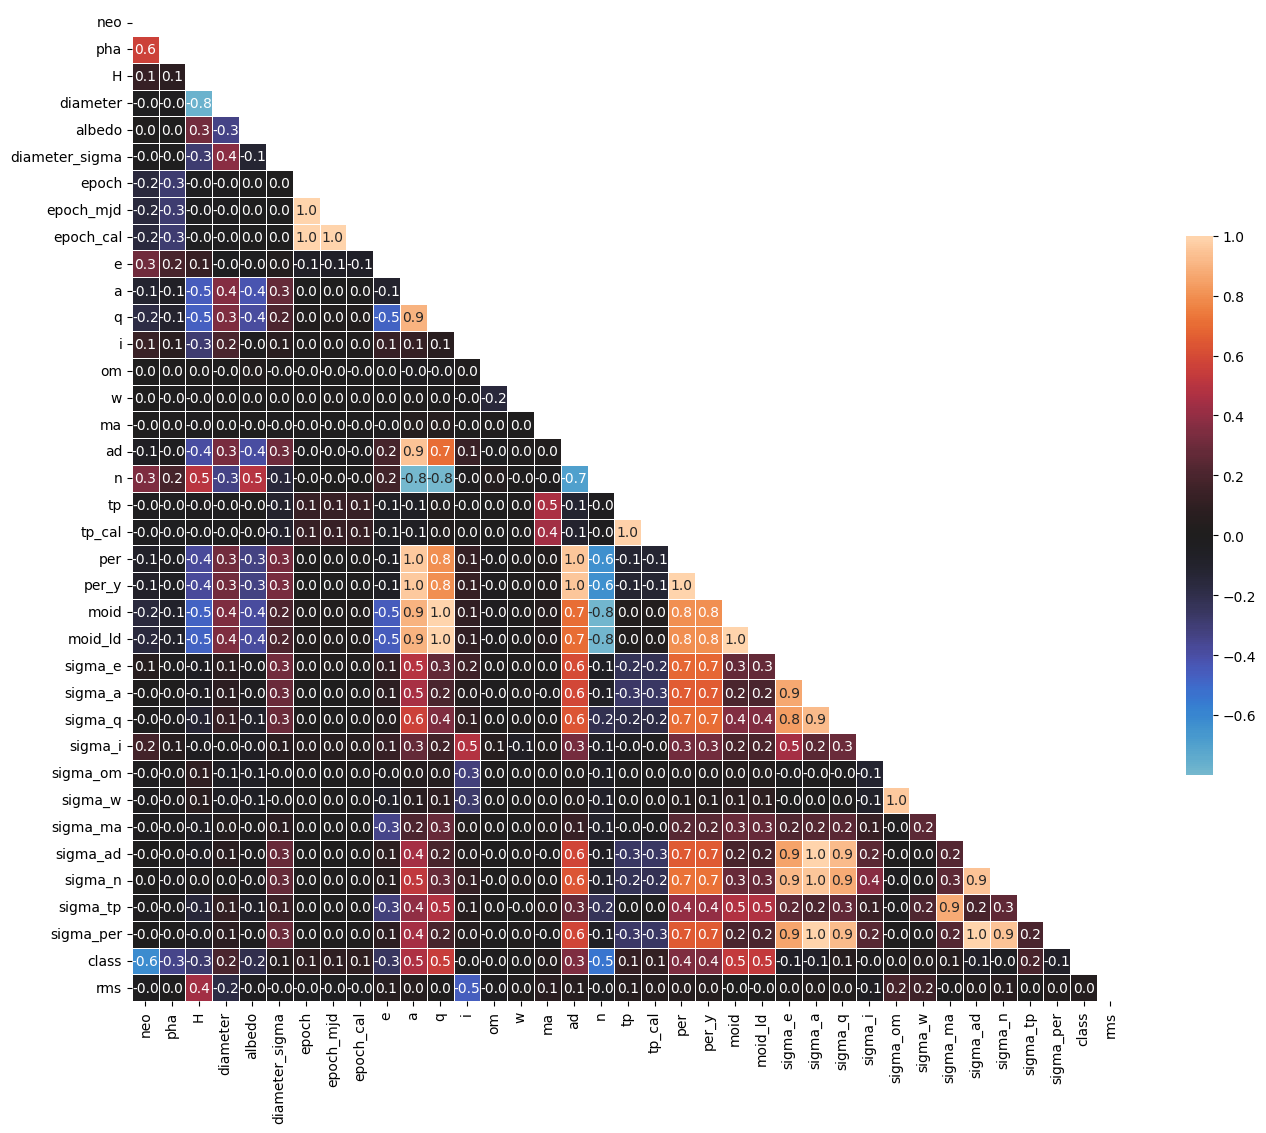

In [ ]:
#Here, we can make a heatmap of correlation
a_corr = df_asteroid.corr()   #calculate the correlations between cols
mask = np.triu(np.ones_like(a_corr, dtype=bool))     #create mask to hide repeated mirrored info
f, ax = plt.subplots(figsize=(16, 14))         #define the size of the heatmap

#draw the heatmap
a_heatmap=sns.heatmap(a_corr, mask=mask, vmax=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f")

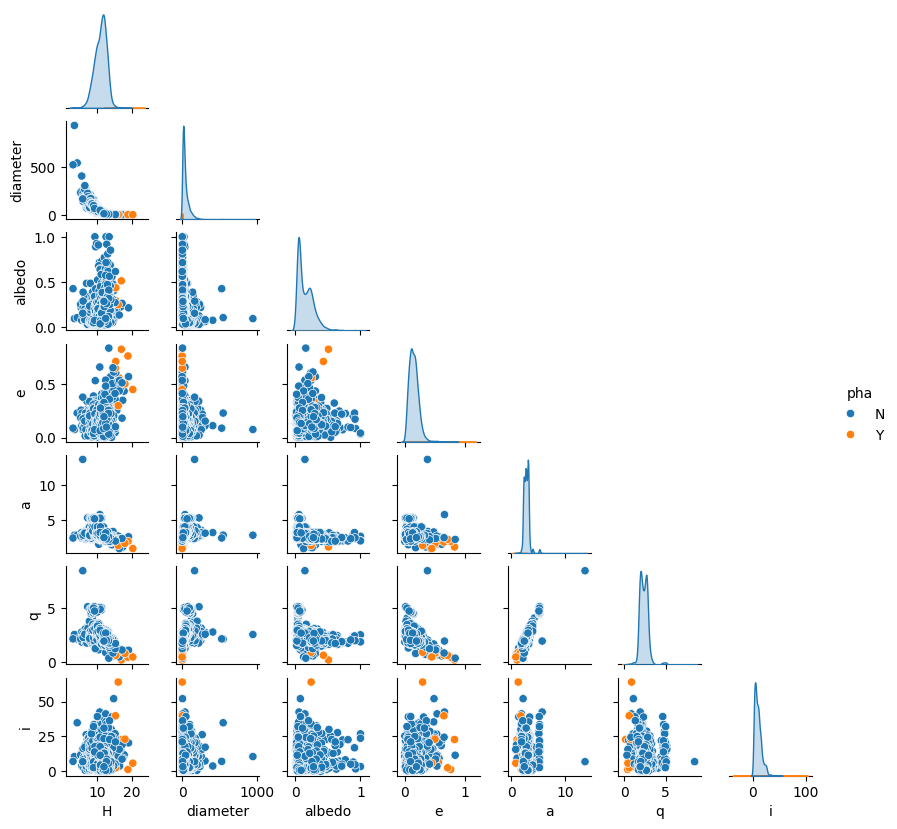

In [ ]:
#Lets make pair plots to see the general structure of the data.
#Since there are so many columns, lets take a portion of it where the corelations are non-zero

#make this col a category so that we can color the plots
df_asteroid = df_asteroid.astype('float')
df_asteroid['pha'] = df_asteroid['pha'].astype('category')

#draw pair plots using the first 2500 datapoints, where orange are asteroids that are hazardous
pp_asteroids = sns.pairplot(corner=True,
                            data=df_asteroids.loc[0:2500, ['pha','H','diameter','albedo','e','a','q','i']],
                            hue=('pha'),
                            height=1.2)
#The data looks pretty good, but some of the graphs in the pair plot
#look like they need to be normalized

# **Normalize the data**

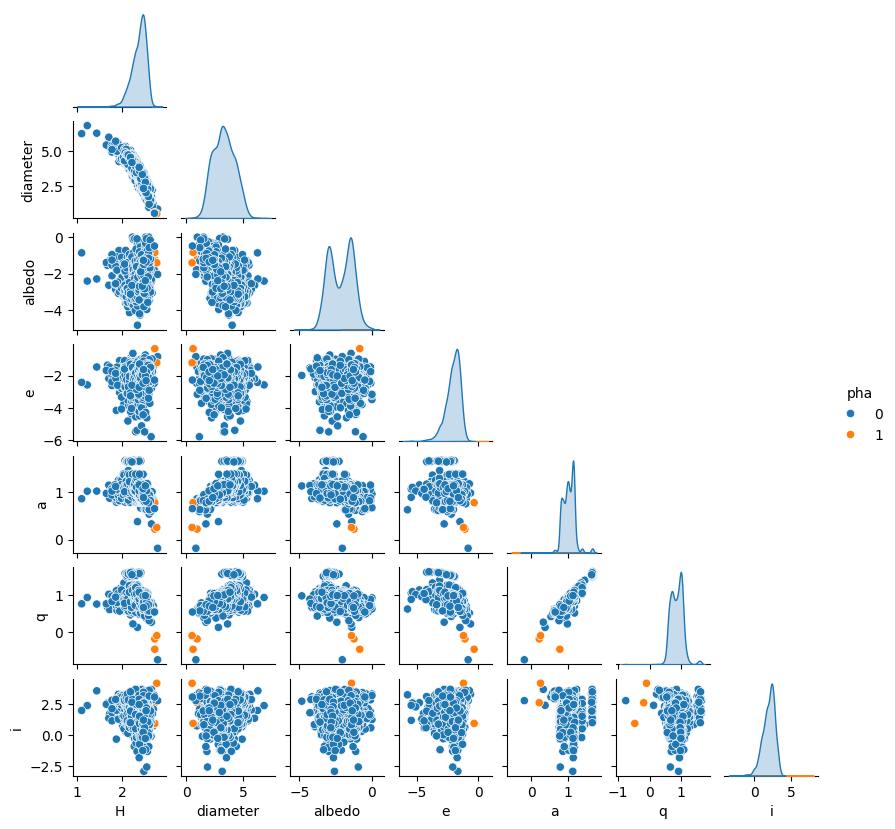

In [ ]:
# lets normalize the data and see the difference with pairplots

#here we can log all of the numerical columns by dropping our non-numerical cols and re-add them
df_asteroid_normalized = np.log(df_asteroid.drop(['neo','class','pha'],axis=1)) #normalize them
df_asteroid_normalized.loc[:,['neo','class','pha']] = df_asteroid.loc[:,['neo','class','pha']]

#to make sure the other dataset has the columns in the same order, we will drop and add the columns here too
df_asteroid = df_asteroid.drop(['neo','class','pha'],axis=1)
df_asteroid.loc[:,['neo','class','pha']] = df_asteroid_normalized.loc[:,['neo','class','pha']]

#draw the normalized pair plot
pp_asteroids = sns.pairplot(corner=True,
                            data=df_asteroid_normalized.loc[0:2500, ['pha','H','diameter','albedo','e','a','q','i']],
                            hue=('pha'),
                            height=1.2)

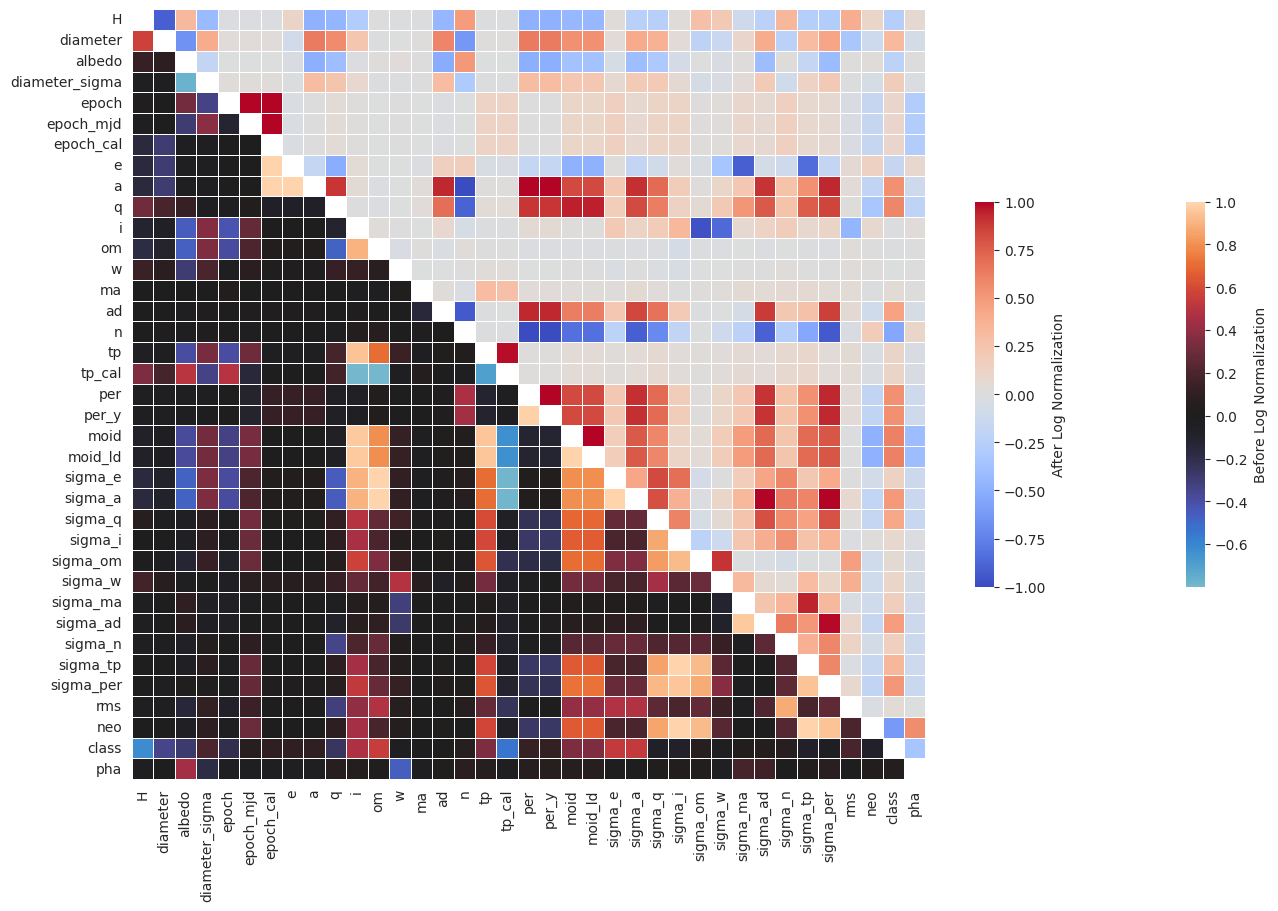

In [ ]:
#Lets make another heatmap of the new normalized data
df_asteroid_normalized['pha'] = df_asteroid_normalized['pha'].astype('int64')

an_corr = df_asteroid_normalized.corr()   #calculate the correlations between logged data

#define the size of the graph
f = plt.figure(figsize = (16,10))

#define the mask for the regular heat map
mask = np.zeros_like(a_corr)
mask[np.triu_indices_from(mask)] = True

# Display the correlation heatmap for the non normalized
with sns.axes_style("white"):
    ax1 = sns.heatmap(a_corr, mask=mask, cbar_kws={'label': 'Before Log Normalization',"shrink": .5},vmax=1.0, center=0, linewidths=.5,fmt=".1f")

#define the 2nd mask for the same graph
mask2 = np.zeros_like(a_corr)
mask2[np.tril_indices_from(mask2)] = True
# Display the correlation heatmap for the normalized
with sns.axes_style("white"):
    ax2 = sns.heatmap(an_corr, mask=mask2,cmap="coolwarm", cbar_kws={'label': 'After Log Normalization',"shrink": .5},vmax=1.0, center=0, linewidths=.5,fmt=".1f")

#we can see that the normalized data has higher correlation scores than does the non-normalized data

# **Data separation**

In [ ]:
#Lets separate our data into features and targets
from sklearn.model_selection import train_test_split

features = df_asteroid_normalized.columns
features = features.drop('pha')    #'pha' is our target column and it is at the end


#Lets do this for both our normalized data and our original data

#ORIGINAL SEPARATION
#x is our feature points and y is our target points
x = df_asteroid[features]
y = df_asteroid['pha']

#Split the data into Test and Train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)



#NORMALIZED SEPARATION
#x is our feature points and y is our target points
xn = df_asteroid_normalized[features]
yn = df_asteroid_normalized['pha']

#Split the data into Test and Train
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.3)


# **Model 1**
Supervised Learning Using K-Nearest Neighbor
Here with these initial builds of these models, we are starting training with the non-normalized data. Later for tuning, we will explore the effect of the normalization on the accuracy scores. K-Nearest Neighbor was chosen to focus on beacause it looks at the relationship between the datapoints around a new one to figure out its classifacation, which seems to fit nicely with the way our data has been discovered to relate to each other during our data exploration segment.

In [ ]:
#Lets import necessary Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #for checking the model accuracy
#This will examaine the 5 nearest neighbors,the default k value
asteroid_knn=KNeighborsClassifier(n_neighbors=5)
asteroid_knn.fit(x_train,y_train)
prediction=asteroid_knn.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.9973841554559043


# **Model 2**
**Initial Model Accuracy Comparisons**

So far, we've seen how accurate K-Nearest Neighbor is when predicting hazardous asteroids. But how accurate would other models be? And how do they compare to the previous two? The KNN model has an accuracy rating of 99.9% accuracy and the Decision Tree model is also holds a 99.9% accuracy rating. Let's see how the two other models stack up.

**Support Vector Machines (SVM)**

In [ ]:
#Lets build the SVM Model
from sklearn import svm
#We now train our SVM model
asteroid_svm = svm.SVC()
asteroid_svm.fit(x_train,y_train)
#Print how accurate it is
prediction=asteroid_svm.predict(x_test)
print('The accuracy of the SVM is',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is 0.9981315396113603


# **Logistic Regression**

In [ ]:
#Import necessary Libraries
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm

asteroid_logreg = LogisticRegression(max_iter=1000)
asteroid_logreg.fit(xn_train,yn_train) #needed to use normalized data because a warning was thrown
prediction=asteroid_logreg.predict(xn_test)
#Print it's accuracy
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,yn_test))

The accuracy of the Logistic Regression is 0.999626307922272


In [ ]:
#logistic regression with non-normalized data
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm

asteroid_logreg = LogisticRegression(max_iter=1000)
asteroid_logreg.fit(x_train,y_train) #needed to use normalized data because a warning was thrown
prediction=asteroid_logreg.predict(x_test)
#Print it's accuracy
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9977578475336323


# **Accuracy Comparisons**

The Logistic regression model (normalized) appear to be the most accurate by a small margin, with a value of 0.999626307922272. The SVM model is the second most accurate model at 0.9981315396113603. Finally the KNN is the least accurate by a small margin, at 0.9973841554559043.

# **Model Evaluation: Testing, Tuning, and Cross-Validation**

In [ ]:
#Lets define some functions to help test our models

#tests the model against random data points
def random_test(model, fraction=.00005, dataset=df_asteroid_normalized):
    #model = ML model name
    #fraction = fraction of the total data to use
    #dataset = dataset used (original or normalized)
    #returns 2 arrays, the first is the prediction, the 2nd is the actual
    rand_test = dataset.sample(frac=fraction)
    feat = rand_test.columns
    feat = feat.drop('pha')
    x_rand = rand_test.loc[:,feat]
    y_rand = rand_test['pha']
    test_out = model.predict(x_rand)
    return test_out, np.asarray([y_rand])

#tests the model against similar ratios hazardous and non-hazardous
def semetric_test(model, fraction=.00005, fraction2=.05, dataset=df_asteroid_normalized):
    #model = ML model name
    #fraction = fraction of the total data to use
    #dataset = dataset used (original or normalized)
    #returns 2 arrays, the first is the prediction, the 2nd is the actual
    asteroid_sort = dataset.sort_values('pha', ascending=False)
    hazard = asteroid_sort[:181]
    non_hazard = asteroid_sort[182:]
    test_set = pd.concat([hazard.sample(frac=fraction2),non_hazard.sample(frac=fraction)])
    test_set = test_set.sample(frac=1)
    feat = test_set.columns
    feat = feat.drop('pha')
    x_rand = test_set.loc[:,feat]
    y_rand = test_set['pha']
    test_outs = model.predict(x_rand)
    return test_outs, np.asarray([y_rand])

def generate_random_dataset(fraction=0.05, fraction2=0.5, dataset=df_asteroid_normalized):
    asteroid_sort = dataset.sort_values('pha', ascending=False)
    hazard = asteroid_sort[:181]
    non_hazard = asteroid_sort[182:]
    test_set = pd.concat([hazard.sample(frac=fraction2),non_hazard.sample(frac=fraction)])
    test_set = test_set.sample(frac=1)
    feat = test_set.columns
    feat = feat.drop('pha')
    x_rand = test_set.loc[:,feat]
    y_rand = test_set['pha']
    return x_rand, y_rand

# **Testing the Models**

Since the overwhelming majority of our data is classified as 'non-hazerdous' I wanted to make sure that the error was not occuring on items that were classified as 'hazardous'. To test this, I made two functions that grabs random small portions of the data to check. The results of this section should give us insights as to how to better adjust hyperparameters and training data.

In [ ]:
#Lets start by checking our KNN model
print("K-Nearest Model:")
knn_prediction, knn_actual = semetric_test(asteroid_knn)
print("Prediction: ", knn_prediction)
print("Actual:    ", knn_actual)

#SVM
print("\nSVM Model")
svm_prediction, svm_actual = semetric_test(asteroid_svm)
print("Prediction: ", svm_prediction)
print("Actual:    ", svm_actual)

#Log Reg
print("\nLogistic Regression Model")
logreg_prediction, logreg_actual = semetric_test(asteroid_logreg)
print("Prediction: ", logreg_prediction)
print("Actual:    ", logreg_actual)

K-Nearest Model:
Prediction:  [0 0 0 0 0 0 0 0 0]
Actual:     [[0 0 0 0 0 1 0 0 0]]

SVM Model
Prediction:  [0 0 0 0 0 0 0 0 0]
Actual:     [[0 0 0 0 0 0 1 0 0]]

Logistic Regression Model
Prediction:  [1 1 1 1 1 1 1 1 1]
Actual:     [[0 0 0 0 0 0 0 0 0]]


So far, KNN, SVM, and LogReg are not looking too good. The largeness of the dataset and the ratio of hazard to non-hazard has not been benificial to the models. Lets fix that by creating some smaller datasets to train and test on.

# **Cross-Validation and Hyperparameters**
After tuning the models by adjusting the datasets, we can cross-validate the data and tune hyperparameters to prevent over-fitting

The best value of k is 12


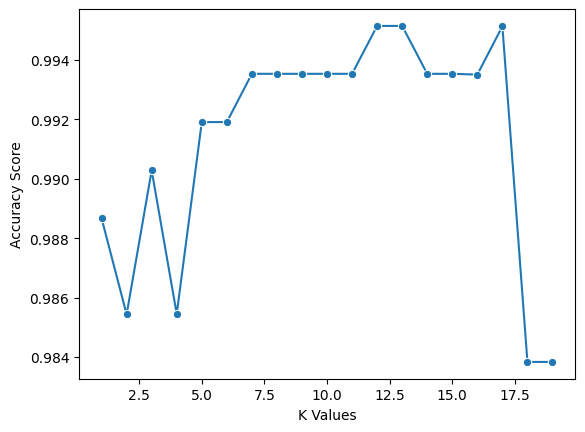

In [ ]:
#Lets preform some cross validation for all of the other models, first the KNN
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,20)]
scores = []

#asteroid_knn is the name of our knn model
#our pairs of datasets are called X, Y for the new one and x, y for the old one
#here we are using our new set:  X and Y

#check the cross_val_score for the model trained with each k value
for k in k_values:
    asteroid_knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(asteroid_knn, X, Y, cv=5)
    scores.append(np.mean(score))

#here we plot the results of the accuracy scores and the k value
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

print(f"The best value of k is {scores.index(max(scores))+1}")
asteroid_knn = KNeighborsClassifier(n_neighbors=k_values[scores.index(max(scores))+1])

In [ ]:
#Next, lets cross-validate the Logistical Regression model
from sklearn.model_selection import KFold, cross_val_score

#asteroid_logreg is our LR model, same as before, the new pair of datasets are called X and Y

k_folds = KFold(n_splits = 5)
scores = cross_val_score(asteroid_logreg, X, Y, cv=k_folds)

print("Cross Validation Scores: ",scores)
print("Average CV Score: ",scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99193548 1.         0.99193548 0.98373984 1.        ]
Average CV Score:  0.9935221610280619
Number of CV Scores used in Average:  5


In [ ]:
#Finally, lets cross-validate our SVM Model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

#We have to use a Support Vector Classifier or SVC
svm_classifier = SVC(kernel='linear')

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

#We use the SVC instead of the re-tooled SVM, as it functions the exact same way
scores = cross_val_score(svm_classifier, X, Y, cv=kf)

print(f'Cross-Validation Results (Accuracy): {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print("Number of CV Scores used in Average: ", len(scores))

Cross-Validation Results (Accuracy): [1.         1.         0.99193548 0.98373984 1.        ]
Mean Accuracy: 0.9951350642538686
Number of CV Scores used in Average:  5


**Cross Validation using HyperParameters**

In [ ]:
#Now, lets do the SVM, since it needs this the most

#We define the parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

#Now, we must fit the model for the grid search
grid.fit(xnew_train, ynew_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.986 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.986 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
#Print the best parameter after tuning
print(grid.best_params_)

#Print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)


In [ ]:
from sklearn.metrics import classification_report
#Print the Predictions
grid_predictions = grid.predict(xnew_test)

#Now lets print the classification report
print(classification_report(ynew_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       245
           1       0.60      1.00      0.75         3

    accuracy                           0.99       248
   macro avg       0.80      1.00      0.87       248
weighted avg       1.00      0.99      0.99       248



In [ ]:
#Lets do the Logistical Regression Model now
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=1000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(xnew_train,ynew_train)
#Lets print the best scores and parameters
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)
#the fit failed warning, different kernels work with different penalties so the fails are expected

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


{'C': 0.1, 'penalty': 'l2'}
0.991891891891892


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

In [ ]:
#Lets print the accuracy score now
logreg2=LogisticRegression(C=1,penalty="l2",max_iter=1000)
logreg2.fit(xnew_train,ynew_train)
print(logreg2.score(xnew_test,ynew_test))

0.9919354838709677


# **Insights**
Insights learned from the Models

This was a massive project and I learned a lot from it. Using our particular dataset, I learned how these models interact with large amounts of data and the importance of having clean, scaled datasets. Each model has its own benefits, but some were made to fit my particular goal better than others. Overall, my logistic regression models worked the best out of the 3 I played with. Right from the start, the logistic regression model was able to handle the large, cleaned dataset and was able to accurately identify hazardous asteroids while others struggled. It seemed that LRM had an easier time because they were specifically looking for the hazardous asteroids in their classifications. After doing some more tests on our models, i discovered that there were so few hazardous asteroids in the data that all of the other models were unable to reliably predict them regardless of their high accuracy ratings. These high accuracy ratings (which were slightly lower than the LRM) was a give-away that something was wrong. When checking the percentage of hazardous asteroids to non-hazardous, the percentage was so small that it could be accounted for in the error. After cross-validating the models, reducing the datasets, and using that information to tune the hyperparameters, all of the models were working significantly better.

Applications
Using machine learning in the field of astronomy is extremely important as scientists are constantly cataloging more objects in the night sky. Massive surveys are run and machine learning helps process the data faster than ever before, where it would have been done by hand. With what i have done with this project, it is a very practical use of machine learning as it helps identify dangers to Earth that we would want to monitor and act on if they came too close.